This notebook contains the code for the decision tree (baseline model), the random forest classifier as well as the gradient boosting algorithm.

In [32]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Mounting the drive
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Initializing
X_train = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_train.csv').values
X_train_df = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_test.csv').values
X_test_df = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_test.csv')
X_val = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_val.csv').values
X_val_df = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_val.csv')
y_train = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/y_train.csv').values
y_train = np.ravel(y_train)
y_test = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/y_test.csv').values
y_test = np.ravel(y_test)
y_test_df = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/y_test.csv')
y_val = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/y_val.csv').values
features = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_train.csv').columns

### **Baseline Model: Decision Tree**

In [4]:
# Training the classifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
errors = abs(y_pred - y_test)

# Computing accuracy for different quartiles
diff = y_pred - y_test
acc = np.zeros((len(y_pred), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_test == 1])
acc_2 = np.mean(acc[y_test == 2])
acc_3 = np.mean(acc[y_test == 3])
acc_4= np.mean(acc[y_test == 4])


print("Q1: " + str(acc_1))
print("Q2: " + str(acc_2))
print("Q3: " + str(acc_3))
print("Q4: " + str(acc_4))

Q1: 0.859331040950297
Q2: 0.5263831148065238
Q3: 0.44034978138663333
Q4: 0.6095475042761623


### **Feature Selection**

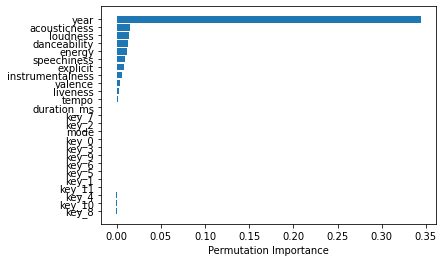

In [5]:
# Calculation of permutation-based importance
perm_importance = permutation_importance(dt, X_test, y_test, n_repeats = 10)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [24]:
# Dropping features as specified in the report based on the permutation-based importance results

X_train = X_train_df.drop(['year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode'], axis=1).values
X_test = X_test_df.drop(['year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode'], axis=1).values
X_val = X_val_df.drop(['year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode'], axis=1).values

features = pd.read_csv('/content/drive/My Drive/CIS520_final_project/data/clean_quartiles/X_train.csv').columns
features = features.drop(['year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode']).values
print(features)

['acousticness' 'danceability' 'duration_ms' 'energy' 'explicit'
 'instrumentalness' 'liveness' 'loudness' 'speechiness' 'tempo' 'valence']


In [7]:
# Classifier training post feature selection

dt = DecisionTreeClassifier().fit(X_train, y_train).fit(X_train, y_train)
print("Max Features " + str(dt.max_features_))
print("Depth " + str(dt.get_depth()))

Max Features 11
Depth 42


In [8]:
# Calculation of training accuracy 

y_pred_train = dt.predict(X_train)
errors = abs(y_pred_train - y_train)

diff = y_pred_train - y_train
acc = np.zeros((len(y_pred_train), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_train == 1])
acc_2 = np.mean(acc[y_train == 2])
acc_3 = np.mean(acc[y_train == 3])
acc_4= np.mean(acc[y_train == 4])

print("Training Accuracy Q1: " + str(acc_1))
print("Training Accuracy Q2: " + str(acc_2))
print("Training Accuracy Q3: " + str(acc_3))
print("Training Accuracy Q4: " + str(acc_4))

Training Accuracy Q1: 0.9998963515754561
Training Accuracy Q2: 0.9962275905032186
Training Accuracy Q3: 0.9924153217427444
Training Accuracy Q4: 0.987059843885516


In [9]:
# Calculation of test accuracy
y_pred = dt.predict(X_test)
errors = abs(y_pred - y_test)

#y_hat = np.ravel(y_hat)
diff = y_pred - y_test
acc = np.zeros((len(y_pred), 1))
acc[diff==0] = 1
acc[diff==1] = 0

#Wanted to iterate later over different hyperparameter combinations hence the arrays
acc_1 = np.mean(acc[y_test == 1])
acc_2 = np.mean(acc[y_test == 2])
acc_3 = np.mean(acc[y_test == 3])
acc_4= np.mean(acc[y_test == 4])

print("Test Accuracy Q1: " + str(acc_1))
print("Test Accuracy Q2: " + str(acc_2))
print("Test Accuracy Q3: " + str(acc_3))
print("Test Accuracy Q4: " + str(acc_4))


Test Accuracy Q1: 0.6814629571741169
Test Accuracy Q2: 0.38631275983370644
Test Accuracy Q3: 0.34415990006246094
Test Accuracy Q4: 0.4798631628051625


Confusion matrix, without normalization
[[4360 1139  568  331]
 [1108 2416 1732  998]
 [ 533 1769 2204 1898]
 [ 346 1056 1943 3086]]
Normalized confusion matrix
[[0.68146296 0.17802438 0.08877774 0.05173492]
 [0.17716661 0.38631276 0.27694276 0.15957787]
 [0.08322923 0.2762336  0.3441599  0.29637726]
 [0.0538019  0.16420463 0.30213031 0.47986316]]


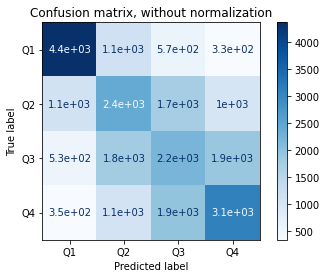

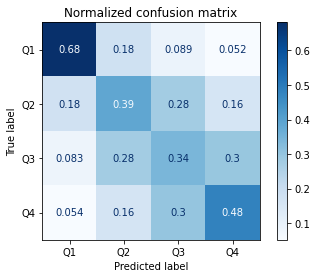

In [35]:
# Plot confusion matrix based on the trained model and testing data
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=["Q1", "Q2", "Q3", "Q4"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

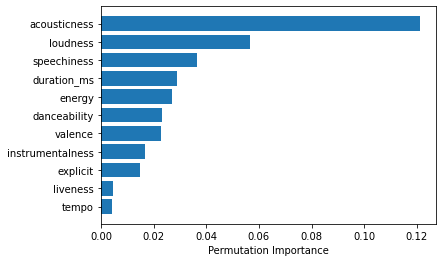

In [13]:
# Permutation-based importance post feature selection
perm_importance = permutation_importance(dt, X_test, y_test, n_repeats = 10)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

### **Random Forest Classifier**

In [ ]:
# Training and hyperparameter tuning of random forest classifier

n_estimators = [10, 50, 100]
min_samples_leaf = [1, 5, 10, 20, 50]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



# Custom implementation of hyperparameter search to allow maximization of Q4 accuracy
max_accuracy = 0
parameters = np.zeros((4,), dtype=int)

for n in n_estimators:
  for f in max_features:
    for d in max_depth:
      for msl in min_samples_leaf:
        rf = RandomForestClassifier(n_estimators = n, max_features = f, max_depth = d, min_samples_leaf=msl, random_state = None).fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        diff = y_pred - y_test
        acc = np.zeros((len(y_pred), 1))
        acc[diff==0] = 1
        acc[diff==1] = 0

        acc_4= np.mean(acc[y_test == 4])
        
        if acc_4 > max_accuracy:
          max_accuracy = acc_4
          
          parameters[0] = n
          
          if f =='auto':
            parameters[1] = 0
          if f=='sqrt':
            parameters[1] = 1
          
          parameters[2] = d
          parameters[3] = msl         
          print("Current Max: " + str(acc_4))
          print("Current Parameters: " + str(parameters))

        
print(max_accuracy)
print(parameters)
print("n_estimators: " + str(parameters[0]))
print("max_features: " + str(parameters[1]))
print("max_depth: " + str(parameters[2]))
print("min_samples_leaf: " + str(parameters[3]))

In [25]:
# Random forest model with best hyperparameters

rf_best = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 10, min_samples_leaf=10, random_state = None).fit(X_train, y_train)


In [26]:
# Training accuracy 

y_pred_train = rf_best.predict(X_train)
errors = abs(y_pred_train - y_train)

diff = y_pred_train - y_train
acc = np.zeros((len(y_pred_train), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_train == 1])
acc_2 = np.mean(acc[y_train == 2])
acc_3 = np.mean(acc[y_train == 3])
acc_4= np.mean(acc[y_train == 4])

print("Training Accuracy Q1: " + str(acc_1))
print("Training Accuracy Q2: " + str(acc_2))
print("Training Accuracy Q3: " + str(acc_3))
print("Training Accuracy Q4: " + str(acc_4))

Training Accuracy Q1: 0.8126036484245439
Training Accuracy Q2: 0.5932719595763827
Training Accuracy Q3: 0.31904135208145734
Training Accuracy Q4: 0.6384041630529055


In [16]:
# Test accuracy
y_pred = rf_best.predict(X_test)
errors = abs(y_pred - y_test)

diff = y_pred - y_test
acc = np.zeros((len(y_pred), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_test == 1])
acc_2 = np.mean(acc[y_test == 2])
acc_3 = np.mean(acc[y_test == 3])
acc_4= np.mean(acc[y_test == 4])

print("Test Accuracy Q1: " + str(acc_1))
print("Test Accuracy Q2: " + str(acc_2))
print("Test Accuracy Q3: " + str(acc_3))
print("Test Accuracy Q4: " + str(acc_4))

Test Accuracy Q1: 0.8032197561738044
Test Accuracy Q2: 0.5601215222257755
Test Accuracy Q3: 0.2821673953778888
Test Accuracy Q4: 0.6208987715751827


Confusion matrix, without normalization
[[5121 1091   85  101]
 [1099 3477 1189  489]
 [ 464 2132 1838 1970]
 [ 314 1003 1123 3991]]
Normalized confusion matrix
[[0.80040638 0.17052204 0.0132854  0.01578618]
 [0.17572753 0.55596418 0.19011832 0.07818996]
 [0.07245472 0.33291693 0.28700812 0.30762024]
 [0.048826   0.1559633  0.17462292 0.62058778]]


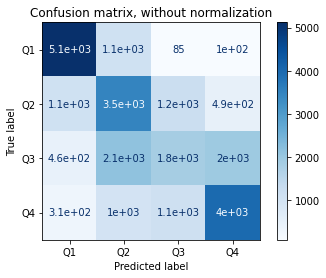

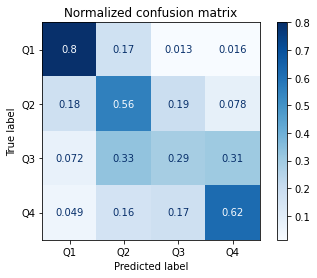

In [36]:
# Plot confusion matrix based on the trained model and testing data
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_best, X_test, y_test,
                                 display_labels=["Q1", "Q2", "Q3", "Q4"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### **Gradient Boosting Algorithm**

In [ ]:
# Hyperparameter search for gradient boosting algorithm

learning_rate = [0.01, 0.1, 0.5, 1]
n_estimators = [10, 30, 50]
max_features = ['auto', 'sqrt']
max_depth = [3, 5, 8, 10]
min_samples_leaf = [1, 5, 10, 20]

# Custom implementation of hyperparameter search to allow maximization of Q4 accuracy
max_accuracy = 0
parameters = np.zeros((5,), dtype=int)

for n in n_estimators:
  for f in max_features:
    for d in max_depth:
      for lr in learning_rate :
        for msl in min_samples_leaf:
          gb = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, max_features=f, max_depth=d, min_samples_leaf=msl).fit(X_train, y_train)

          y_pred = gb.predict(X_test)
          diff = y_pred - y_test
          acc = np.zeros((len(y_pred), 1))
          acc[diff==0] = 1
          acc[diff==1] = 0

          acc_4= np.mean(acc[y_test == 4])
          
          if acc_4 > max_accuracy:
            max_accuracy = acc_4
            
            parameters[0] = n
            
            if f =='auto':
              parameters[1] = 0
            if f=='sqrt':
              parameters[1] = 1
            
            parameters[2] = d
            parameters[3] = lr
            parameters[4] = msl          
            print("Current Max: " + str(acc_4))
            print("Current Parameters: " + str(parameters))

        
print(max_accuracy)
print(parameters)
print("n_estimators: " + str(parameters[0]))
print("max_features: " + str(parameters[1]))
print("max_depth: " + str(parameters[2]))
print("learning rate: " + str(parameters[3]))
print("min_samples_leaf: " + str(parameters[4]))

In [27]:
# Gradient boosting implementation with optimized parameters
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=30, max_features = 'sqrt', min_samples_leaf = 5).fit(X_train, y_train)

In [28]:
# Training accuracy 

y_pred_train = gbc.predict(X_train)
errors = abs(y_pred_train - y_train)

diff = y_pred_train - y_train
acc = np.zeros((len(y_pred_train), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_train == 1])
acc_2 = np.mean(acc[y_train == 2])
acc_3 = np.mean(acc[y_train == 3])
acc_4= np.mean(acc[y_train == 4])

print("Training Accuracy Q1: " + str(acc_1))
print("Training Accuracy Q2: " + str(acc_2))
print("Training Accuracy Q3: " + str(acc_3))
print("Training Accuracy Q4: " + str(acc_4))

Training Accuracy Q1: 0.8132600884466556
Training Accuracy Q2: 0.3696961306845712
Training Accuracy Q3: 0.2597838886195193
Training Accuracy Q4: 0.6480832610581093


In [29]:
# Test accuracy
y_pred = gbc.predict(X_test)
errors = abs(y_pred - y_test)

diff = y_pred - y_test
acc = np.zeros((len(y_pred), 1))
acc[diff==0] = 1
acc[diff==1] = 0

acc_1 = np.mean(acc[y_test == 1])
acc_2 = np.mean(acc[y_test == 2])
acc_3 = np.mean(acc[y_test == 3])
acc_4= np.mean(acc[y_test == 4])

print("Test Accuracy Q1: " + str(acc_1))
print("Test Accuracy Q2: " + str(acc_2))
print("Test Accuracy Q3: " + str(acc_3))
print("Test Accuracy Q4: " + str(acc_4))

Test Accuracy Q1: 0.818224445139106
Test Accuracy Q2: 0.3680844259673809
Test Accuracy Q3: 0.2523422860712055
Test Accuracy Q4: 0.6502876691027834


Confusion matrix, without normalization
[[5235  860  153  150]
 [1472 2302 1517  963]
 [ 701 1481 1616 2606]
 [ 478  803  968 4182]]
Normalized confusion matrix
[[0.81822445 0.13441701 0.02391372 0.02344483]
 [0.23536936 0.36808443 0.24256476 0.15398145]
 [0.10946284 0.23126171 0.25234229 0.40693317]
 [0.07432748 0.12486394 0.15052091 0.65028767]]


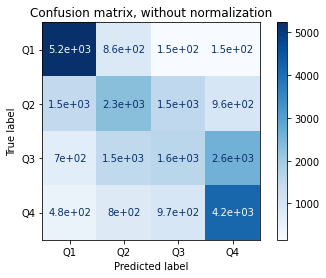

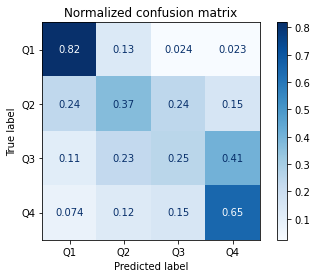

In [37]:
# Plot confusion matrix based on the trained model and testing data
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gbc, X_test, y_test,
                                 display_labels=["Q1", "Q2", "Q3", "Q4"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()